In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
import pandas_bokeh
from datetime import datetime
from matplotlib.pyplot import figure

# System libraries to import the data
import os.path 
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Chargement de la bibliothéque Bootstrap et du module HTML
from IPython.core.display import display, Markdown, Latex, HTML
HTML(open("./styles/theme.min.css", "r").read())

# afficher jusqu'a 500 lignes
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from pandas_profiling import ProfileReport

from collections import Counter
from wordcloud import WordCloud

from bokeh.palettes import brewer
#pandas_bokeh.output_notebook()
from bokeh.plotting import figure, show, output_file, save
from bokeh.layouts import gridplot


# Create Bokeh-Table with DataFrame:
from bokeh.models.widgets import DataTable, TableColumn
from bokeh.models import ColumnDataSource

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print('Require')

Require


In [271]:
df_raw = pd.read_csv('clean_p3.csv', encoding="utf-8")
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320749 entries, 0 to 320748
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               320749 non-null  int64  
 1   code                     320749 non-null  object 
 2   product_name             302987 non-null  object 
 3   created_datetime         320748 non-null  object 
 4   categories_fr            84389 non-null   object 
 5   pnns_groups_1            91536 non-null   object 
 6   pnns_groups_2            94514 non-null   object 
 7   nutrition_grade_fr       221233 non-null  object 
 8   additives_n              236033 non-null  float64
 9   additives_fr             154702 non-null  object 
 10  labels_fr                46644 non-null   object 
 11  saturated-fat_100g       227661 non-null  float64
 12  sodium_100g              251833 non-null  float64
 13  cholesterol_100g         142619 non-null  float64
 14  fibe

<hr /><h1 style="text-align: center;"><span style="color: #666699;">💾 <em><strong>Analyse univarié</strong></em></span></h1>

<hr/><h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Données statistiques des variables quantitatives</strong></em></span></h2>

In [8]:
des.columns

Index(['index', 'nutrition-score-fr_100g', 'additives_n', 'energy_100g',
       'proteins_100g', 'carbohydrates_100g', 'fat_100g', 'sugars_100g',
       'salt_100g', 'fiber_100g'],
      dtype='object')

In [50]:
des = df.describe().round(2)
des['index'] = des.index
des = des[['index','nutrition-score-fr_100g','additives_n','energy_100g','proteins_100g',
          'carbohydrates_100g', 'fat_100g','sugars_100g', 'salt_100g', 'fiber_100g']]
data_table = DataTable(
    columns=[TableColumn(field=Ci, title=Ci) for Ci in des.columns],
    source=ColumnDataSource(des),
    height=300,
    sizing_mode='stretch_width',
    #index_header='mois',
    reorderable = True
    
)
#output_file(filename="C:/wamp64/www/p3/sites/default/files/describe.html", title="Static HTML file")

show(data_table)
pandas_bokeh.output_notebook()


Loading BokehJS ...

<hr/><h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Données statistiques de nutriments de base</strong></em></span></h2><h4 style="text-align: center;"><span style="color: #666699;"><em><strong>Glucides - Lipides - Proteines - Sel - Sucre</strong></em></span></h4>

In [140]:
df = df_raw.copy()
df = df[['carbohydrates_100g','fat_100g','sugars_100g','proteins_100g','salt_100g']]

Text(0, 0.5, 'Nutriments de base')

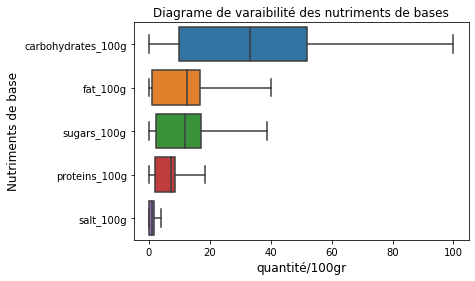

In [133]:
# make boxplot with Seaborn's boxplot function
# with data in wide form 
sns.boxplot(data=df,
            showfliers=False, 
            orient='h', ).set_title("Diagrame de varaibilité des nutriments de bases")
# set x-axis label
plt.xlabel("quantité/100gr", size=12)
# set y-axis label
plt.ylabel("Nutriments de base", size=12)

<hr/><h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Données statistiques de la valeur énergetique</strong></em></span></h2>

In [158]:
df = df_raw.copy()

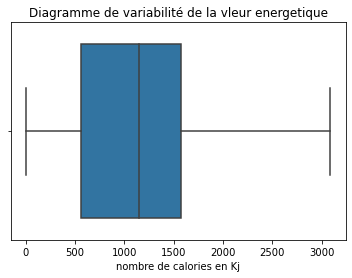

In [159]:
box_circ = sns.boxplot(df['energy_100g'], showfliers=False,)
box_circ.set_title("Diagramme de variabilité de la vleur energetique")
box_circ.set_xlabel("nombre de calories en Kj")
plt.show()

<hr/><h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Données statistiques de la note de nutriscore</strong></em></span></h2>

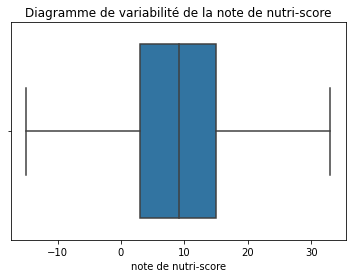

In [160]:
box_circ = sns.boxplot(df['nutrition-score-fr_100g'], showfliers=False,)
box_circ.set_title("Diagramme de variabilité de la note de nutri-score")
box_circ.set_xlabel("note de nutri-score")
plt.show()

In [161]:
def most_common_word(labels, nb=100, sep=","):
    words=[]
    tab=[]
    for lab in labels:
        words+=str(lab).split(sep)
    count=Counter(words)
    for word in count.most_common(nb):
        tab.append(word)
    return tab
print('def most_common_word()')

def most_common_word()


In [162]:
def wordclouding(data, label='product_name', sep=' '):
    """To return a wordcloud present in the column 'label', the separation of the word is the argument 'sep' '"""
    words = []
    
    for string in data[label]:
        listwords= str(string).split(sep)
        for w in listwords:
            if (w!=' ')and (w!='nan'):
                words.append(w)
    count=Counter(words)
        

    wordcloud = WordCloud(width=1080, height=920, colormap='PuBuGn').fit_words(count)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.show()
    
print('def wordclouding()')

def wordclouding()


<hr/><h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Top 10 des mots les plus fréquents dans  labels_fr</strong></em></span></h2>

In [163]:
most_common_word(df['labels_fr'],10)

[('nan', 274105),
 ('Bio', 14129),
 ('Bio européen', 13286),
 ('AB Agriculture Biologique', 9977),
 ('Point Vert', 9493),
 ('Végétarien', 5137),
 ('Végétalien', 4084),
 ('Sans conservateurs', 3595),
 ('Eco-emballages', 3381),
 ('Sans gluten', 3194)]

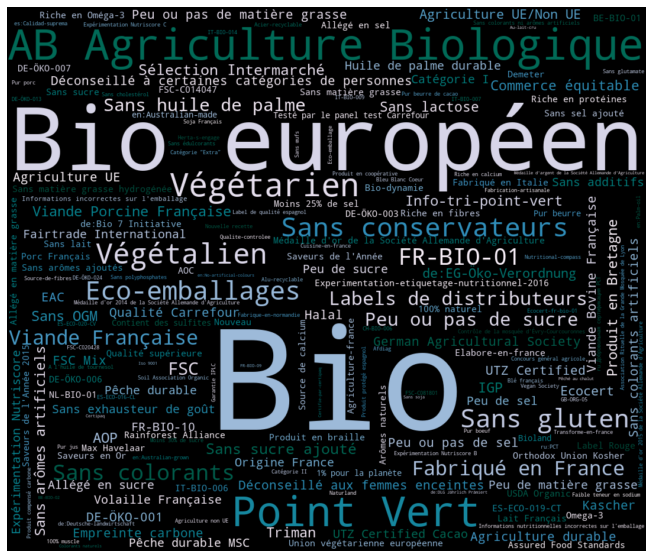

In [164]:
wordclouding(df, label='labels_fr', sep=',')

<hr/><h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Top 10 des pays les plus fréquents</strong></em></span></h2>

In [165]:
most_common_word(df['countries_fr'], 10)

[('États-Unis', 173467),
 ('France', 98463),
 ('Suisse', 16931),
 ('Allemagne', 8640),
 ('Royaume-Uni', 5626),
 ('Espagne', 5393),
 ('Belgique', 3458),
 ('Australie', 2149),
 ('Italie', 1364),
 ('Russie', 1362)]

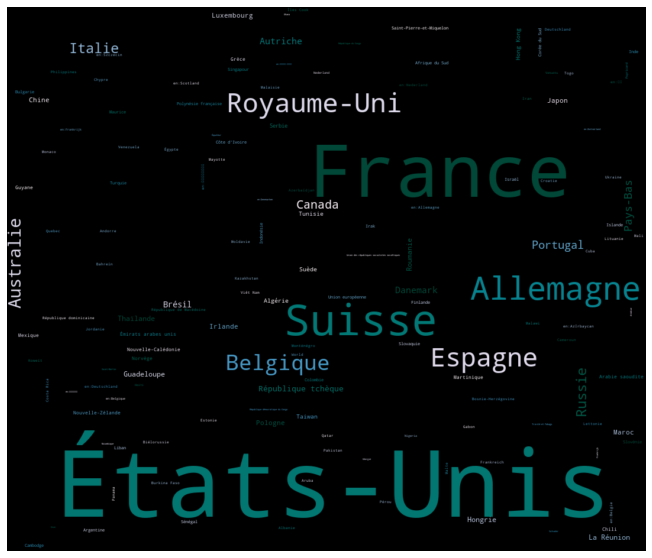

In [166]:
wordclouding(df, label='countries_fr', sep=',')

<hr/><h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Top 10 des mots les plus fréquents dans  pnns_groups_1</strong></em></span></h2>

In [167]:
most_common_word(df['pnns_groups_1'], 12)

[('nan', 229213),
 ('unknown', 22626),
 ('Sugary snacks', 12368),
 ('Beverages', 9033),
 ('Milk and dairy products', 8846),
 ('Cereals and potatoes', 8442),
 ('Fish Meat Eggs', 8041),
 ('Composite foods', 6747),
 ('Fruits and vegetables', 5908),
 ('Fat and sauces', 5216),
 ('Salty snacks', 2809),
 ('fruits-and-vegetables', 987)]

<hr/><h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Top 10 des mots les plus fréquents dans  categories_fr</strong></em></span></h2>

In [168]:
most_common_word(df['categories_fr'],10)

[('nan', 236360),
 ('Aliments et boissons à base de végétaux', 26605),
 ("Aliments d'origine végétale", 22691),
 ('Boissons', 11949),
 ('Snacks sucrés', 11416),
 ('Produits laitiers', 9302),
 ('Aliments à base de fruits et de légumes', 7896),
 ('Céréales et pommes de terre', 7775),
 ('Plats préparés', 7317),
 ('Céréales et dérivés', 5875)]

<hr/><h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Création de nouvelles catégories pour etudier les recommandations du Haut conseil de Santé publique</strong></em></span></h2>

In [169]:
fruit_legumes = {'fruit & legumes' : ["Aliments et boissons à base de végétaux",
                "Aliments d'origine végétale",
                "Aliments à base de fruits et de légumes",
                "Céréales et pommes de terre",
                "Céréales et dérivés",
                "Frais",
                "Boissons à base de végétaux",
                "Légumes et dérivés",
                "Fruits et produits dérivés",
                "Boissons aux fruits",
                "Jus et nectars",
                "Jus et nectars de fruits",
                "Aliments à base de plantes en conserve",
                "Jus de fruits",
                "Aliments à base de plantes frais",
                "Légumes en conserve",
                "Fruits à coques et dérivés",
                "Soupes",
                "Fruits",
                "Confitures de fruits",
                "Compotes",
                "Jus de fruits 100% pur jus",
                "Légumes frais",
                "Légumineuses",
                "Légumineuses et dérivés",
                "Fruits à coques et dérivés"]
                }

legumineuse = {'Legumineuse' : ["Légumineuses","Légumineuses et dérivés"] }
        
boissons = {'Boissons' : ["Boissons","Boissons non sucrées","Boissons alcoolisées",
                          "Boissons sans alcool", "Boissons sucrées","Boissons chaudes",
                          "Boissons gazeuses","Sodas","Bières","Vins","Infusions","Eaux"]
           }
        
produits_sucre = {'Produits Sucrés' : ["Snacks sucrés","Desserts","Biscuits et gâteaux","Gâteaux",
                             "Chocolats","Biscuits","Confiseries","Produits à tartiner sucrés","Bonbons",
                             "Confitures et marmelades","Biscuits au chocolat","Chocolats noirs","Confitures",
                             "Desserts glacés","esserts lactés","Chocolats au lait"]}


        
produits_cerealiers =  {'Produits Céréaliers' : ["Céréales pour petit-déjeuner","Céréales et dérivés",
                                 "Céréales et pommes de terre","Céréales en grains","Pains",
                                 "Pâtes alimentaires","Pâtes sèches","Petit-déjeuners"]}
        
fruits_coques = {'Fruits à coques' : ['Fruits à coques et dérivés']}
        
produits_laitiers = {'Produits Laitiers' : ["Produits laitiers","Fromages","Yaourts","Fromages de vache","Fromages pasteurisés",
                               "Fromages de France","Laits","Desserts lactés"]}
        
plats_prepares = {'Plats préparés' : ["Plats préparés","Conserves","Plats préparés à réchauffer au micro-ondes",
                            "Plats préparés frais","Plats préparés surgelés","Plats préparés en conserve",
                           "Produits déshydratés"]}

viandes = {'Viandes' : ["Viandes","Charcuteries","Plats à base de viande","Jambons","Volailles"]}
        
poissons = {'Poissons' : ['Poissons','Poissons en conserve','Produits de la mer']}
        
produits_sales = {'Produits Salés' : ["Snacks salés","Apéritif","Chips et frites","Chips","Produits à tartiner salés"]}
        
matieres_grasses = {'Matières Grasses' : ["Spreadable fats","Matières grasses","Pâtes à tartiner végétaux","Sauces"]}

print('Création des nouvelles catégories')

Création des nouvelles catégories


In [170]:
list_cat = [fruit_legumes,matieres_grasses,produits_sales,poissons,
            viandes,plats_prepares,produits_laitiers,
            fruits_coques,produits_cerealiers,produits_sucre,boissons,legumineuse]


In [171]:
def compare_word(word, l):
    if word == ' 'or word == 'nan':
        pass
    for key, val in l.items():
        if word in val:
            return True 
    pass

def new_categ (data, l, lab='main_category'):
    list_column=[]
    for lab in data[lab]:
        list_prov= []
        for w in str(lab).split(","):
            s=compare_word(w, l)
            if s != None:
                break
                        
        list_column.append(s)
        
    data[list(l.keys())[0]] = list_column

for n in list_cat:
    new_categ(df, n, lab='categories_fr')

print('Fonction compare_word & new_categ')

Fonction compare_word & new_categ


<hr/><h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Conversion de l'index en objet DateTime</strong></em></span></h2>

In [172]:
def iso8601_to_epoch(datestring):
    """
    iso8601_to_epoch - convert the iso8601 date into the unix epoch time
    >>> iso8601_to_epoch("2012-07-09T22:27:50.272517")
    1341872870
    """
    return datetime.strptime(datestring, "%Y-%m-%dT%H:%M:%S%fZ")

In [173]:
#On retire les lignes où la date de creation est manquante
#On pourrait aussi remplacé avec df.bfill(axis ='rows') mais il en a une seule
df = df[df['created_datetime'].notna()]

In [174]:
#on convertit 'created_datetime' en objet datetime en convert en unix
df['created_datetime'] = df['created_datetime'].apply(iso8601_to_epoch)

In [175]:
df = df.set_index('created_datetime')

<hr/><h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Suppression des produits n'ayant pas de categories_fr</strong></em></span></h2>

In [176]:
df[(df['categories_fr'].isna())].shape

(236360, 35)

In [177]:
df_cat_ok = df[(~df['categories_fr'].isna())]

In [178]:
df_cat_ok.shape

(84388, 35)

<hr/><h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Distribution des produits par catégorie</strong></em></span></h2>

In [179]:
def pie(df,liste):
    pie = pd.DataFrame()
    count = []
    cat = []
    for i in liste:
        col = list(i.keys())[0]
        s = df[col].sum()
        count.append(s)
        cat.append(col)
    pie['categorie'] = cat
    pie['count'] = count

    return pie.sort_values('count',ascending=False)

df_pie = pie(df_cat_ok, list_cat)
df_pie

categorie  count
0       fruit & legumes  30528
9       Produits Sucrés  16609
10             Boissons  11949
5        Plats préparés  11906
8   Produits Céréaliers  10207
6     Produits Laitiers   9302
1      Matières Grasses   6590
4               Viandes   6476
2        Produits Salés   3874
3              Poissons   2793
11          Legumineuse   1989
7       Fruits à coques   1322

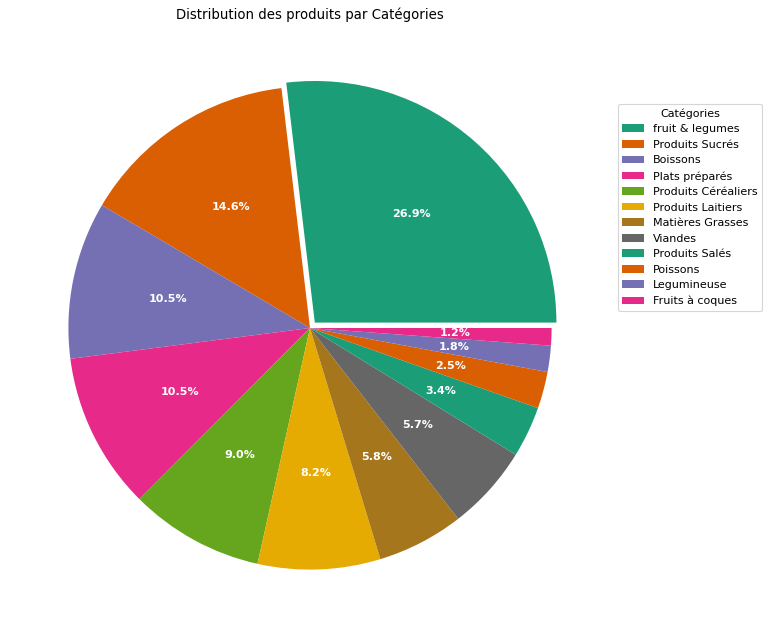

In [180]:
# Draw Plot
fig, ax = plt.subplots(figsize=(18, 10), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df_pie['count']
categories = df_pie['categorie']
explode = [0.03,0,0,0,0,0,0,0,0,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                      autopct=lambda pct: func(pct, data),
                                      textprops=dict(color="w"), 
                                      colors=plt.cm.Dark2.colors,
                                      startangle=0,
                                      explode=explode)

# Decoration
ax.legend(wedges, categories, title="Catégories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1.4))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Distribution des produits par Catégories")
plt.show()

In [181]:
df_pie_bok = df_pie.copy()
df_pie_bok = df_pie_bok.set_index('categorie')
df_pie_bok

count
categorie                 
fruit & legumes      30528
Produits Sucrés      16609
Boissons             11949
Plats préparés       11906
Produits Céréaliers  10207
Produits Laitiers     9302
Matières Grasses      6590
Viandes               6476
Produits Salés        3874
Poissons              2793
Legumineuse           1989
Fruits à coques       1322

In [199]:
pie_cat = df_pie.plot_bokeh.pie(
    x="categorie",
    y="count",
    colormap=brewer['Set3'][12],
    figsize=(600, 420),
    show_figure=False,
    
    )
pie_cat.legend.location = (420,40)
#output_file(filename="C:/wamp64/www/p3/sites/default/files/cat_pie.html", title="Static HTML file")

show(pie_cat)
pandas_bokeh.output_notebook()

__x__values_original


Loading BokehJS ...

In [183]:
quantite = ['proteins_100g','fat_100g','carbohydrates_100g','nutrition_grade_fr','additives_n','fiber_100g','vitamin-a_100g','vitamin-c_100g']

<hr/><h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Analyse du Nutri-grade par catégorie</strong></em></span></h2>

In [200]:
cat = ['fruit & legumes', 'Matières Grasses',
       'Produits Salés', 'Poissons', 'Viandes', 'Plats préparés',
       'Produits Laitiers', 'Fruits à coques', 'Produits Céréaliers',
       'Produits Sucrés', 'Boissons', 'Legumineuse']
nb = []
dfn = pd.DataFrame()
gr = ['a','b','c','d','e']
normalize_min = 0.1
normalize_max = 1
for n in range(len(gr)):
    nb = []
    for i in cat:
        s = df_cat_ok.loc[:,['nutrition_grade_fr', i]].groupby('nutrition_grade_fr').count()[i][n]
        nb.append(s)
    dfn[gr[n]] = nb
    
for i in range(len(dfn)):
    dfn.iloc[i] = dfn.iloc[i].apply(lambda x : round((x / dfn.iloc[i].sum())*100,1)) 

dfn.index = cat
dfn.index = dfn.index.set_names('Catégories') 
dfn

p_bar = dfn.plot_bokeh.bar(
    ylabel="%", 
    colormap= brewer['RdYlGn'][5],
    #title="Nutriscore par Catégorie", 
    vertical_xlabel=True,
    figsize=(600, 250),
    sizing_mode="scale_width",
    alpha=0.8,
    show_figure=False)

#output_file(filename="C:/wamp64/www/p3/sites/default/files/cat_nutri_horiz.html", title="Static HTML file")

show(p_bar)
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [185]:
dfn.reset_index(inplace=True)
g = dfn.plot_bokeh(
    x="Catégories",
    colormap= brewer['RdYlGn'][5],
    kind="barh",
    title="Nutriscore par Catégorie",
    stacked=True,
    alpha=0.8,
    figsize=(1000, 400),
    show_figure=False)
#g.legend.location = (100,100)

#output_file(filename="C:/wamp64/www/p3/sites/default/files/cat_nutri.html", title="Static HTML file")

show(g)
pandas_bokeh.output_notebook()

Loading BokehJS ...

<hr/><h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Comparaison du nombre d'additifs avec les différents nutriments de bases selon le Nutri-grade</strong></em></span></h2>

In [246]:
from bokeh.document import Document
from bokeh.embed import file_html
from bokeh.layouts import gridplot
from bokeh.models import (BasicTicker, Circle, ColumnDataSource, DataRange1d,
                          Grid, LinearAxis, PanTool, Plot, WheelZoomTool)
from bokeh.resources import INLINE
from bokeh.util.browser import view

df_add_matrix = df.copy()
df_add_matrix = df[(df.countries_fr.str.contains('France') == True) & ~(df.nutrition_grade_fr.isna())].sample(10000) 
df_add_matrix = df_add_matrix[['nutrition_grade_fr', 'additives_n', 'proteins_100g', 'fat_100g', 'carbohydrates_100g',]]
colormap = {'a': '#037D3F', 'b': '#81B52E', 'c': '#F6C502' , 'd': '#E77D00', 'e': '#DF3C10'}

df_add_matrix['color'] = df_add_matrix['nutrition_grade_fr'].map(lambda x: colormap[x])


source = ColumnDataSource(
    data=dict(
        additives_n=df_add_matrix['additives_n'],
        proteins_100g=df_add_matrix['proteins_100g'],
        fat_100g=df_add_matrix['fat_100g'],
        carbohydrates_100g=df_add_matrix['carbohydrates_100g'],
        color=df_add_matrix['color']
    )
)

xdr = DataRange1d(bounds=None)
ydr = DataRange1d(bounds=None)

def make_plot(xname, yname, xax=False, yax=False):
    mbl = 40 if yax else 0
    mbb = 40 if xax else 0
    plot = Plot(
        x_range=xdr, y_range=ydr, background_fill_color="#efe8e2",
        border_fill_color='white', width=200 + mbl, height=200 + mbb,
        min_border_left=2+mbl, min_border_right=2, min_border_top=2, min_border_bottom=2+mbb)

    circle = Circle(x=xname, y=yname, fill_color="color", fill_alpha=0.2, size=4, line_color="color")
    r = plot.add_glyph(source, circle)

    xdr.renderers.append(r)
    ydr.renderers.append(r)

    xticker = BasicTicker()
    if xax:
        xaxis = LinearAxis()
        xaxis.axis_label = xname
        plot.add_layout(xaxis, 'below')
        xticker = xaxis.ticker
    plot.add_layout(Grid(dimension=0, ticker=xticker))

    yticker = BasicTicker()
    if yax:
        yaxis = LinearAxis()
        yaxis.axis_label = yname
        yaxis.major_label_orientation = 'vertical'
        plot.add_layout(yaxis, 'left')
        yticker = yaxis.ticker
    plot.add_layout(Grid(dimension=1, ticker=yticker))

    plot.add_tools(PanTool(), WheelZoomTool())

    return plot

xattrs = ["additives_n", "proteins_100g", "fat_100g", "carbohydrates_100g"]
yattrs = list(reversed(xattrs))
plots = []

for y in yattrs:
    row = []
    for x in xattrs:
        xax = (y == yattrs[-1])
        yax = (x == xattrs[0])
        plot = make_plot(x, y, xax, yax)
        row.append(plot)
    plots.append(row)

grid = gridplot(plots)
#output_file(filename="C:/wamp64/www/p3/sites/default/files/corr_nutri.html", title="Static HTML file")

show(grid)
pandas_bokeh.output_notebook()


Loading BokehJS ...

<hr /><h1 style="text-align: center;"><span style="color: #666699;">&#128300;<em><strong> Recommandion n°1 - Limiter la consommation d’additifs</strong></em></span></h1>

<h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Analysons la variable nombre d'additifs</strong></em></span></h2>

In [84]:
most_common_word(df['additives_fr'], 11)

[('nan', 166047),
 ('E330 - Acide citrique', 44808),
 ('E322 - Lécithines', 26787),
 ('E101 - Riboflavine', 22383),
 ('E375 - Acide nicotinique', 22341),
 ('E300 - Acide ascorbique', 15124),
 ('E415 - Gomme xanthane', 14721),
 ('E412 - Gomme de guar', 11416),
 ('E407 - Carraghénanes', 9259),
 ('E331 - Citrates de sodium', 9006),
 ('E150a - Caramel E150a', 8897)]

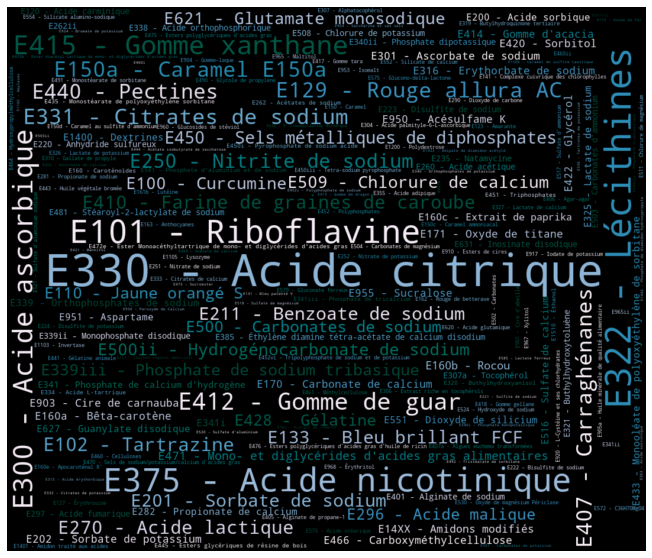

In [85]:
wordclouding(df, label='additives_fr', sep=',')

<h2 style="text-align: center;"><span style="color: #C55E11;">🔖 <em><strong>On voit qu'il existe un grand nombre d'additifs différents environ 40000, avec une dominance  E330 - Acide citrique, E322 - Lécithines, E101 - Riboflavine, E375 - Acide nicotinique.</strong></em></span></h2>

<hr /><h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Données statistiques pour la variable additifs en France et dans le reste du monde</strong></em></span></h2>

In [243]:
df = df_raw.copy()
add = df[['additives_n']].describe().T.append(df.additives_n.groupby(df['countries_fr'].str.contains('France')).describe().sort_values('count'))
add = add.rename(index={'additives_n': 'World', False:'Other', True:'France'})
add = round(add,2)
add['index'] = add.index
add = add[['index', 'mean', 'std', 'min', '25%', '50%', '75%', 'max','count']]

data_table_w = DataTable(
    columns=[TableColumn(field=Ci, title=Ci) for Ci in add.columns],
    source=ColumnDataSource(add),
    sizing_mode='stretch_width',
    reorderable = True
)

#output_file(filename="C:/wamp64/www/p3/sites/default/files/table_world_additif.html", title="Static HTML file")
show(data_table_w)
pandas_bokeh.output_notebook()


Loading BokehJS ...

In [231]:
df_add = df.copy()
df_add = df_add[['additives_n']]
df_add['group'] = "Nombre d'additifs" 

cats = ["Distribution statistique pour les additifs"]

# find the quartiles and IQR for each category
groups = df_add.groupby('group')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.additives_n > upper.loc[cat]['additives_n']) | (group.additives_n < lower.loc[cat]['additives_n'])]['additives_n']
out = groups.apply(outliers).dropna()

# prepare outlier data for plotting, we need coordinates for every outlier.
if not out.empty:
    outx = list(out.index.get_level_values(0))
    outy = list(out.values)

p = figure(background_fill_color="#efefef", x_range=cats)

# if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.additives_n = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'additives_n']),upper.additives_n)]
lower.additives_n = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'additives_n']),lower.additives_n)]

# stems
p.segment(cats, upper.additives_n, cats, q3.additives_n, line_color="black")
p.segment(cats, lower.additives_n, cats, q1.additives_n, line_color="black")

# boxes
p.vbar(cats, 0.3, q2.additives_n, q3.additives_n, fill_color="#E08E79", line_color="black")
p.vbar(cats, 0.3, q1.additives_n, q2.additives_n, fill_color="#3B8686", line_color="black")

# whiskers (almost-0 height rects simpler than segments)
p.rect(cats, lower.additives_n, 0.2, 0.01, line_color="black")
p.rect(cats, upper.additives_n, 0.2, 0.01, line_color="black")

# outliers
if not out.empty:
    p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 2
p.xaxis.major_label_text_font_size="16px"

# set output to static HTML file
#output_file(filename="C:/wamp64/www/p3/sites/default/files/box_plot_additif.html", title="Static HTML file")
show(p)
pandas_bokeh.output_notebook()


<h2 style="text-align: center;"><span style="color: #C55E11;">🔖 <em><strong>Environ 1/4 des produits n'ont pas d'additifs 1/4 n'ont qu'un additif 1/4 ont entre 1 et 3 additifs et le dernier 1/4 entre 3 et 7</strong></em></span></h2>

<hr style="border: 0;
    height: 1px;">

<h1 style="text-align: center;">
    <strong>📊
        <em>
            <span style="color: #64686e;">
                 Nombre d'additifs par Catégories
            </span>
        </em>
</h1>

In [89]:
df['pnns_groups_1'] = df['pnns_groups_1'].replace('sugary-snacks','Sugary snacks')
df['pnns_groups_1'] = df['pnns_groups_1'].replace('salty-snacks','Salty snacks')
df['pnns_groups_1'] = df['pnns_groups_1'].replace('fruits-and-vegetables','Fruits and vegetables')
df['pnns_groups_1'] = df['pnns_groups_1'].replace('cereals-and-potatoes','Cereals and potatoes')

In [121]:
df_add = df.copy()
df_add = df_add[['additives_n','pnns_groups_1']]
df_add['group'] = df_add['pnns_groups_1'] 

#cats = list(df_add.groupby('pnns_groups_1')['additives_n'].median().sort_values().index)
cats = ['Boissons',
 'Céréales',
 'Aliments composés',
 'Gras et sauces',
 'Oeufs viande poisson',
 'Fruits et légumes',
 'Produits laitiers',
 'Snacks salés',
 'Snacks sucrés',
 'inconnu']

# find the quartiles and IQR for each category
groups = df_add.groupby('group')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.additives_n > upper.loc[cat]['additives_n']) | (group.additives_n < lower.loc[cat]['additives_n'])]['additives_n']
out = groups.apply(outliers).dropna()

# prepare outlier data for plotting, we need coordinates for every outlier.
if not out.empty:
    outx = list(out.index.get_level_values(0))
    outy = list(out.values)

pm = figure(background_fill_color="#efefef", 
            x_range=cats
    )

# if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.additives_n = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'additives_n']),upper.additives_n)]
lower.additives_n = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'additives_n']),lower.additives_n)]

# stems
pm.segment(cats, upper.additives_n, cats, q3.additives_n, line_color="black")
pm.segment(cats, lower.additives_n, cats, q1.additives_n, line_color="black")

# boxes
pm.vbar(cats, 0.7, q2.additives_n, q3.additives_n, fill_color="#E08E79", line_color="black")
pm.vbar(cats, 0.7, q1.additives_n, q2.additives_n, fill_color="#3B8686", line_color="black")

# whiskers (almost-0 height rects simpler than segments)
pm.rect(cats, lower.additives_n, 0.2, 0.01, line_color="black")
pm.rect(cats, upper.additives_n, 0.2, 0.01, line_color="black")

# outliers
if not out.empty:
    pm.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

pm.xgrid.grid_line_color = None
pm.ygrid.grid_line_color = "white"
pm.grid.grid_line_width = 2
pm.xaxis.major_label_text_font_size="11px"
pm.width=1000
pm.height=800

#output_file(filename="C:/wamp64/www/p3/sites/default/files/box_plot_additif_categorie.html", title="Static HTML file")

show(pm)
pandas_bokeh.output_notebook()


<h2 style="text-align: center;"><span style="color: #C55E11;">🔖 <em><strong>Sans surprise on retrouve une grande quantité d'additifs dans les plats préparés ainsi que les snacks sucrés</strong></em></span></h2>

<hr/><h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Comparaison du nombre d'additifs avec les différents nutriments de bases en fonction du Nutri-grade</strong></em></span></h2>

In [248]:
dfv = df[~(df['nutrition_grade_fr'].isnull())]
color = ('#E77D00','#81B52E','#F6C502','#037D3F','#DF3C10')

p_scatter = dfv.plot_bokeh.scatter(
    x="fat_100g",
    y="additives_n",
    colormap=color,
    category="nutrition_grade_fr",
    title="Nb d'additifs Vs Lipide",
    #size="carbohydrates_100g",
    show_figure=False,
    sizing_mode='scale_both',
)
a = p_scatter.legend[0].items.pop(3)
b = p_scatter.legend[0].items.pop(1)
c = p_scatter.legend[0].items.pop(1)
d = p_scatter.legend[0].items.pop(0)
e = p_scatter.legend[0].items.pop(0)
p_scatter.legend[0].items.append(a)
p_scatter.legend[0].items.append(b)
p_scatter.legend[0].items.append(c)
p_scatter.legend[0].items.append(d)
p_scatter.legend[0].items.append(e)

p_scatter2 = dfv.plot_bokeh.scatter(
    x="proteins_100g",
    y="additives_n",
    colormap=color,
    category="nutrition_grade_fr",
    title="Nb d'additifs Vs Proteine",
    #size="carbohydrates_100g",
    show_figure=False,
    sizing_mode='scale_both',
)
a = p_scatter2.legend[0].items.pop(3)
b = p_scatter2.legend[0].items.pop(1)
c = p_scatter2.legend[0].items.pop(1)
d = p_scatter2.legend[0].items.pop(0)
e = p_scatter2.legend[0].items.pop(0)
p_scatter2.legend[0].items.append(a)
p_scatter2.legend[0].items.append(b)
p_scatter2.legend[0].items.append(c)
p_scatter2.legend[0].items.append(d)
p_scatter2.legend[0].items.append(e)

p_scatter3 = dfv.plot_bokeh.scatter(
    
    x="carbohydrates_100g",
    y="additives_n",
    colormap=color,
    category="nutrition_grade_fr",
    title="Nb d'additifs Vs Glucide",
    #size="carbohydrates_100g",
    show_figure=False,
    sizing_mode='scale_both',
)
a = p_scatter3.legend[0].items.pop(3)
b = p_scatter3.legend[0].items.pop(1)
c = p_scatter3.legend[0].items.pop(1)
d = p_scatter3.legend[0].items.pop(0)
e = p_scatter3.legend[0].items.pop(0)
p_scatter3.legend[0].items.append(a)
p_scatter3.legend[0].items.append(b)
p_scatter3.legend[0].items.append(c)
p_scatter3.legend[0].items.append(d)
p_scatter3.legend[0].items.append(e)

p_scatter4 = dfv.plot_bokeh.scatter(
    
    x="energy_100g",
    y="additives_n",
    colormap=color,
    category="nutrition_grade_fr",
    title="Nb d'additifs Vs energie",
    #size="carbohydrates_100g",
    show_figure=False,
    sizing_mode='scale_both',
)
a = p_scatter4.legend[0].items.pop(3)
b = p_scatter4.legend[0].items.pop(1)
c = p_scatter4.legend[0].items.pop(1)
d = p_scatter4.legend[0].items.pop(0)
e = p_scatter4.legend[0].items.pop(0)
p_scatter4.legend[0].items.append(a)
p_scatter4.legend[0].items.append(b)
p_scatter4.legend[0].items.append(c)
p_scatter4.legend[0].items.append(d)
p_scatter4.legend[0].items.append(e)

#output_file(filename="C:/wamp64/www/p3/sites/default/files/nutriment_additif2.html", title="Static HTML file")
show(gridplot([p_scatter,p_scatter2,p_scatter3,p_scatter4], ncols=2,    toolbar_location=None))
pandas_bokeh.output_notebook()


Loading BokehJS ...

<hr style="border: 0;
    height: 1px;">

<h1 style="text-align: center;">
    <strong>📊
        <em>
            <span style="color: #64686e;">
                 Données statistiques sur les additifs en fonction du Nutriscore
            </span>
        </em>
</h1>

In [238]:
df_add = df.copy()
df_add = df_add[['additives_n','nutrition_grade_fr']]
df_add['group'] = df_add['nutrition_grade_fr'] 

cats = ["A","B","C","D","E"]

# find the quartiles and IQR for each category
groups = df_add.groupby('group')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.additives_n > upper.loc[cat]['additives_n']) | (group.additives_n < lower.loc[cat]['additives_n'])]['additives_n']
out = groups.apply(outliers).dropna()

# prepare outlier data for plotting, we need coordinates for every outlier.
if not out.empty:
    outx = list(out.index.get_level_values(0))
    outy = list(out.values)

pb = figure(background_fill_color="#efefef", x_range=cats)

# if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.additives_n = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'additives_n']),upper.additives_n)]
lower.additives_n = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'additives_n']),lower.additives_n)]

# stems
pb.segment(cats, upper.additives_n, cats, q3.additives_n, line_color="black")
pb.segment(cats, lower.additives_n, cats, q1.additives_n, line_color="black")

# boxes
pb.vbar(cats, 0.7, q2.additives_n, q3.additives_n, fill_color="#E08E79", line_color="black")
pb.vbar(cats, 0.7, q1.additives_n, q2.additives_n, fill_color="#3B8686", line_color="black")

# whiskers (almost-0 height rects simpler than segments)
pb.rect(cats, lower.additives_n, 0.2, 0.01, line_color="black")
pb.rect(cats, upper.additives_n, 0.2, 0.01, line_color="black")

# outliers
if not out.empty:
    pb.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

pb.xgrid.grid_line_color = None
pb.ygrid.grid_line_color = "white"
pb.grid.grid_line_width = 2
pb.xaxis.major_label_text_font_size="16px"
#output_file(filename="C:/wamp64/www/p3/sites/default/files/box_plot_nutriscore.html", title="Static HTML file")

show(pb)
pandas_bokeh.output_notebook()


Loading BokehJS ...

<h2 style="color: #64686e;">
    <strong>🔖
        <em>
<span>On voit que le nombre d'<span style="text-decoration: underline;"><strong>additifs augmente</strong></span> &agrave; mesure que l'indice de <span style="text-decoration: underline;"><strong>qualit&eacute; nutritionnel diminue</strong></span></p>
<p>Pourtant le nombre d'additifs ne rentre pas en compte dans l'algorithme de calcul du nutriscore&nbsp;</p>
<p>On peut le voir avec le produit suivant qui contient <strong><span style="color: #ff0000;">14 additifs</span></strong> et est<strong> <span style="color: #008000;">class&eacute; A</span></strong>
<img src="https://fr.openfoodfacts.org/images/products/800/344/097/3844/front_fr.8.400.jpg"><br>
    (heureusemnt il a &eacute;t&eacute; retir&eacute; de la vente...)</span>
        </em>
</h2>

<hr style="border: 0;
    height: 2px;">

<h1 style="text-align: center;">
    <strong>📉
        <em>
            <span style="color: #64686e;">
                 ANOVA
            </span>
        </em>
</h1>
<h2 style="text-align: center;">
    <strong>
        <em>
            <span style="color: #64686e;">
                 Le nutrigrade a t-il un impact sur le nombre d'additifs ?
            </span>
        </em>
</h2>

In [202]:
df = df_raw.copy()
df = df[~(df['additives_n'].isnull())]

In [203]:
#a = df[(df['nutrition_grade_fr'] == 'a')]['additives_n'].values
b = df[(df['nutrition_grade_fr'] == 'b')]['additives_n'].sample(29500).values
c = df[(df['nutrition_grade_fr'] == 'c')]['additives_n'].sample(29500).values
d = df[(df['nutrition_grade_fr'] == 'd')]['additives_n'].sample(29500).values
#e = df[(df['nutrition_grade_fr'] == 'e')]['additives_n'].values

In [204]:
len(b),len(c),len(d)

(29500, 29500, 29500)

In [205]:
from scipy.stats import levene
stat, p = levene(b,c,d , center='median')
stat, p

(423.52247045619015, 8.733867709854877e-184)

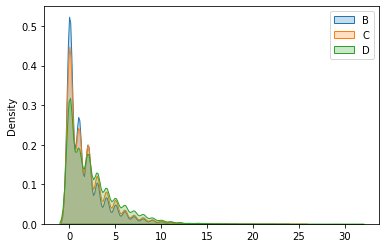

In [206]:
# Construct kernel density estimate plot
#sns.kdeplot(a, label='A', shade=True)
sns.kdeplot(b, label='B', shade=True)
sns.kdeplot(c, label='C', shade=True)
sns.kdeplot(d, label='D', shade=True)
#sns.kdeplot(e, label='E', shade=True)

plt.legend()
plt.show()

In [207]:
# Calculate the grand mean and sample group means
N = np.concatenate([b, c, d]).size
xbar_grand = np.concatenate([b, c, d]).mean()

print(xbar_grand)

2.089276836158192


In [208]:
# Calculate the group means
#xbar_a = a.mean()
xbar_b = b.mean()
xbar_c = c.mean()
xbar_d = d.mean()
#xbar_e = e.mean()

print(xbar_b, xbar_c, xbar_d, sep='\n')

1.7419661016949153
1.9934576271186442
2.532406779661017


In [209]:
# Calculate the sum of squares between groups (SSB)
##ssb_a = len(a) * np.square(xbar_a - xbar_grand)
ssb_b = len(b) * np.square(xbar_b - xbar_grand)
ssb_c = len(c) * np.square(xbar_c - xbar_grand)
ssb_d = len(d) * np.square(xbar_d - xbar_grand)
#ssb_e = len(d) * np.square(xbar_e - xbar_grand)

SSB = (ssb_b + ssb_c + ssb_d)
print(SSB)

9622.021310734464


In [210]:
# Calculate the sum of squares within groups (SSW)
#ssw_a = np.square(a - xbar_a).sum()
ssw_b = np.square(b - xbar_b).sum()
ssw_c = np.square(c - xbar_c).sum()
ssw_d = np.square(d - xbar_d).sum()
#ssw_e = np.square(e - xbar_e).sum()

SSW = ssw_b + ssw_c + ssw_d
print(SSW)

589877.6024067797


In [211]:
# Calculate the degrees of freedom
k = 5        # Number of sample groups
dfB = k - 1  # Degrees of freedom between groups
dfW = N - k  # Degrees of freedom within groups
print(dfB, dfW, sep=', ')

4, 88495


In [212]:
# Calculate the Mean squared difference
MSB = SSB / dfB 
MSW = SSW / dfW 
print(MSB, MSW, sep='\n')

2405.505327683616
6.665660233988131


In [213]:
# Calculate the F-statistic
F = MSB / MSW
print(F)

360.8802794084778


In [214]:
# Find the F-critical value for alpha level .05
F_critical = stats.distributions.f.ppf(1 - .05, dfB, dfW)
print(F_critical)

<IPython.core.display.Javascript object>

2.372032608361678


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

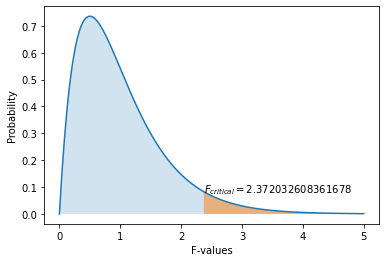

In [215]:
# Plot the F-Distribution for dfB and dfW
x_plot = np.linspace(0, 5, 250)
y_plot = stats.distributions.f.pdf(x_plot, dfB, dfW)
plt.fill_between(x_plot, y_plot, alpha=.2)
plt.plot(x_plot, y_plot)

# Plot the F-critical value at alpha .05
x_fcrit = np.linspace(F_critical, 5, 250)
y_fcrit = stats.distributions.f.pdf(x_fcrit, dfB, dfW)
plt.fill_between(x_fcrit, y_fcrit, alpha=.5)
plt.text(F_critical, .08, '$F_{critical}=$'+str(F_critical))
plt.xlabel('F-values')
plt.ylabel('Probability')
plt.savefig('anova.png')
plt.show()

In [216]:
# Test the null hypothesis
F < F_critical

False

In [217]:
# One-way ANOVA the convenient way
f_value, p_value = stats.f_oneway(b, c, d)
print(p_value)

<IPython.core.display.Javascript object>

1.162559620945e-311


In [218]:
# Null hypothesis test at alpha level .05
p_value > .05

False

<h2 style="text-align: center;">
    <strong>🔖
        <em>
            <span style="color: #c55e11;">
                 Le resultat de l'etude ANOVA avec un seuil de signification de 5% donne une statistique F observé beaucoup plus grande (358) que la valeur critique F, le test de Fisher nous permet donc de rejeter l'hypothèse nulle, puisque il y a une probabilité inférieure à 5% d'avoir une valeur F supérieure à 2,37. Et nous pouvons affirmer avec un risque d'erreur de 5% que  le nutriscore a un impact sur le nombre d'additifs.
            </span>
        </em>
</h2>

<hr style="border: 0;
    height: 2px;">

<h1 style="text-align: center;">
    <strong>📉
        <em>
            <span style="color: #64686e;">
                 Analyse en Composant Principal ACP
            </span>
        </em>
</h1>
<h2 style="text-align: center;">
    <strong>
        <em>
            <span style="color: #64686e;">
                 Voyons si une ACP peut confirme une coorelation et si oui dans quel sens sont-ils corrélés ?
            </span>
        </em>
</h2>

In [219]:
df = df_raw.copy()
df = df[(~df['categories_fr'].isna())]

In [220]:
df.columns

Index(['Unnamed: 0', 'code', 'product_name', 'created_datetime',
       'categories_fr', 'pnns_groups_1', 'pnns_groups_2', 'nutrition_grade_fr',
       'additives_n', 'additives_fr', 'labels_fr', 'saturated-fat_100g',
       'sodium_100g', 'cholesterol_100g', 'fiber_100g', 'energy_100g',
       'proteins_100g', 'fat_100g', 'sugars_100g', 'salt_100g',
       'carbohydrates_100g', 'nutrition-score-fr_100g', 'countries',
       'countries_fr'],
      dtype='object')

In [221]:
df_acp = df.groupby('pnns_groups_1')[df.columns.difference(['Unnamed: 0', 'code', 'product_name', 'countries_fr', 'pnns_groups_1',
       'pnns_groups_2', 'categories_fr', 'additives_fr',
       'labels_fr','countries', 'année', 'fruit & legumes', 'Matières Grasses',
       'Produits Salés', 'Poissons', 'Viandes', 'Plats préparés', 'saturated-fat_100g',
       'Produits Laitiers', 'Fruits à coques', 'Produits Céréaliers',
       'Produits Sucrés', 'Boissons', 'Legumineuse', 'nutrition_grade_fr', 'mois'])].mean()
df_acp = df_acp.fillna(df_acp.mean())
df_acp['nutrition-score-fr_100g'] = -df_acp['nutrition-score-fr_100g']

In [222]:
df_acp.shape

(14, 11)

In [223]:
df_st =  StandardScaler().fit_transform(df_acp)  
#pd.DataFrame(df_st, columns=df_acp.columns)

In [224]:
df_st

array([[ 8.53548715e-02, -5.71454666e-01, -8.34866385e-01,
        -1.06985863e+00, -5.83095192e-01, -1.15747416e+00,
        -2.97010631e-01, -1.10922844e+00, -7.21541947e-01,
        -9.80080230e-01,  3.57751830e-01],
       [-5.58280919e-01,  1.61293224e+00, -8.13267100e-01,
         6.11170077e-01, -5.82376643e-01,  1.14192583e+00,
         6.50389935e-01,  8.64021014e-01, -3.34960875e-01,
        -3.54428898e-01, -3.39867760e-01],
       [ 1.29248988e+00, -6.84409078e-01, -5.26885888e-01,
        -6.65472187e-01, -4.45179595e-01, -4.50012735e-01,
         4.26136502e-01,  2.15608273e-01,  2.47268839e-01,
         2.27495886e-01, -8.22509574e-01],
       [-1.85415114e-02, -9.85229942e-01, -7.22791538e-02,
         1.00358828e+00,  2.34416753e+00, -9.89191357e-01,
        -8.41083036e-01, -1.07042472e+00,  1.17267875e+00,
         1.13805674e+00, -3.13602476e-01],
       [ 3.99347484e-01, -1.14175529e+00,  2.77684103e+00,
        -2.30451376e-01,  1.45060694e-01, -1.10730758e+00,
  

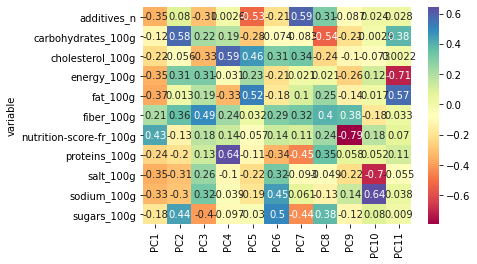

In [225]:
pca_out = PCA().fit(df_st)

# get the component variance
# Proportion of Variance (from PC1 to PC6)
pca_out.explained_variance_ratio_
# output


# Cumulative proportion of variance (from PC1 to PC6)   
np.cumsum(pca_out.explained_variance_ratio_)
# output

       
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_acp.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df
# output


# positive and negative values in component loadings reflects the positive and negative 
# correlation of the variables with the PCs. Except A and B, all other variables have 
# positive projection on first PC.

# get correlation matrix plot for loadings
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()


In [226]:
from bioinfokit.analys import get_data
# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_

# get scree plot (for scree or elbow test)
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca_out.explained_variance_ratio_])
# Scree plot will be saved in the same directory with name screeplot.png

In [227]:
# get PCA loadings plots (2D and 3D)
# 2D
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=df_acp.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

# 3D
cluster.pcaplot(x=loadings[0], y=loadings[1], z=loadings[2],  labels=df_acp.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

In [228]:
# get PC scores
pca_scores = PCA().fit_transform(df_st)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df_acp.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))
    
# get 3D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df_acp.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

<img src="acp/screeplot.png">
<img src="acp/pcaplot_3d.png">
<img src="acp/pcaplot_2d.png">
<img src="acp/biplot_2d.png">

<h2 style="text-align: center;">
    <strong>🔖
        <em>
            <span style="color: #c55e11;">
                 On remarque que le nombre d'additifs est diametralement opposé au nutriscore ce qui signifie que lorsque le nutriscore augmente le nombre d'additifs diminue, on peut donc affirmé que le nutriscore influence le nombre d'additifs
            </span>
        </em>
</h2>

<hr style="border: 0;
    height: 1px;">

<h1 style="text-align: center;">
    <strong>📉
        <em>
            <span style="color: #64686e;">
                 Evolution de la moyenne du nombre d'additif 
            </span>
        </em>
</h1>

In [245]:
df = df_raw.copy()
df = df[(df.countries_fr.str.contains('France') == True)]
def iso8601_to_epoch(datestring):
    """
    iso8601_to_epoch - convert the iso8601 date into the unix epoch time
    >>> iso8601_to_epoch("2012-07-09T22:27:50.272517")
    1341872870
    """
    return datetime.strptime(datestring, "%Y-%m-%dT%H:%M:%S%fZ")

df = df[df['created_datetime'].notna()]

df['created_datetime'] = df['created_datetime'].apply(iso8601_to_epoch)

#df.index = pd.to_datetime(df.index)
df = df.set_index('created_datetime')
df = df.sort_index()

df = df[~(df['additives_n'].isnull())]

pe = df['2013-01-31':'2016-12-31'].additives_n.resample('6M').mean().plot_bokeh(kind="line")

#output_file(filename="C:/wamp64/www/p3/sites/default/files/courbe_temps_additif2.html", title="Static HTML file")
show(pe)
pandas_bokeh.output_notebook()


Loading BokehJS ...

<h2 style="text-align: center;">
    <strong>
        <em>
            <span style="color: #c55e11;">
                 On remarque une nette dimuntion de la moyenne des additifs depuis le courant 2015
            </span>
        </em>
</h2>

<hr style="border: 0;
    height: 1px;">

<h1 style="text-align: center;">
    <strong>🔖
        <em>
            <span style="color: #64686e;">
                 Conclusion sur la consommation d'additifs
            </span>
        </em>
</h1>
<h2>
    <strong>
        <em>
            <span style="color: #64686e;">
              <p>A partir de cette analyse nous pouvons constater que certains chiffres sont rassurant et vont dans le sens de la recommandation et d'autres le sont moins et m&eacute;rites d'&ecirc;tre soulign&eacute;s.</p>
<ol>
<li>Les points <span style="color: #99cc00;"><em><strong>positifs</strong> </em></span>:
<ul>
<li>un quart des produits n'ont aucun additif</li>
<li>le nombre moyen n'est que de 2 additifs</li>
<li>un bon nutri-grade implique souvent un faible nombre d'additif</li>
<li>on remarque une nette diminution de la moyenne des additifs depuis 2015</li>
</ul>
</li><br>
<li>Les points <span style="color: #ff6600;"><em><strong>n&eacute;gatifs</strong> </em></span>:
<ul>
<li>il existe plus de 40000 additifs diff&eacute;rents</li>
<li>la France a une moyenne d'additif par produit plus &eacute;lev&eacute;e que la moyenne mondiale</li>
</ul>
</li>
</ol>
            </span>
        </em>
</h2>

<hr style="border: 0;
    height: 1px;">

<h1 style="text-align: center;">
    <strong>📉
        <em>
            <span style="color: #64686e;">
                 Recommandation n°2 - Privilégier les produits issus d’une agriculture limitant l’apport en pesticides (BIO)
            </span>
        </em>
</h1>

In [276]:
loc_df = df_raw.copy()
loc_df = loc_df[(df.countries_fr.str.contains('France') == True)]

#les produits BIO
bio = loc_df[loc_df['labels_fr'].fillna('nan').str.contains("bio|BIO|Bio")]
#les produits dont le label est renseignés
bio_n = loc_df[~loc_df['labels_fr'].isna()]

date_bio = (pd.to_datetime(bio['created_datetime'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='Label BIO')).sort_values('date',ascending=True)
date_bio = date_bio.set_index('date')
date_bio = date_bio.set_index(date_bio.index.tz_convert(None))

date_bio_n = (pd.to_datetime(bio_n['created_datetime'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='Label Non BIO')).sort_values('date',ascending=True)
date_bio_n = date_bio_n.set_index('date')
date_bio_n = date_bio_n.set_index(date_bio_n.index.tz_convert(None))

tab_bio = date_bio.join(date_bio_n)
tab_bio = tab_bio.fillna(0)
tab_bio['%'] = tab_bio['Label BIO']*100/(tab_bio['Label BIO']+tab_bio['Label Non BIO'])

#Evolution du nombre de nouveau produit BIO par rapport au non BIO
g_bio = tab_bio[:'2017-02-02'].resample('Y').mean().plot_bokeh(kind="line")
g_bio.legend.location = (400,150)
#output_file(filename="C:/wamp64/www/p3/sites/default/files/bio.html", title="Static HTML file")
#show(g_bio)
pandas_bokeh.output_notebook()

Loading BokehJS ...

<h2 style="text-align: center;">
    <strong>🔖
        <em>
            <span style="color: #c55e11;">
                 On remarque qu'il y a une nette augmentation du pourcentage de produits labélisés BIO depuis 2015.
            </span><br>
            <span style="color: #c55e11;">
                 La tendance constatée va donc dans le sens de la recommandation.
            </span>
        </em>
</h2>

<hr style="border: 0;
    height: 1px;">

<h1 style="text-align: center;">
    <strong>📉
        <em>
            <span style="color: #64686e;">
                 Tendances concernant les autres Recommandations.
            </span>
        </em>
</h1>

In [251]:
# reduce data size to one week
dft = df_cat_ok.loc[:'2016-12-31'].replace(True,1).resample('Y').count()

n=1
ps = []
for i in cat:
    a = str('pf'+str(n))
    dft[i] = dft[i] / dft['categories_fr'] *100
    a=figure(x_axis_type="datetime", title=str(i), plot_height=250, plot_width=250)
    a.xgrid.grid_line_color=None
    a.ygrid.grid_line_alpha=0.5
    a.xaxis.axis_label = 'Time'
    a.yaxis.axis_label = 'Value'
    a.line(dft.index, dft[i])
    ps.append(a)
    n += 1
    
gp = gridplot(ps, ncols=4, sizing_mode='fixed')

#output_file(filename="C:/wamp64/www/p3/sites/default/files/autre_recomm.html", title="Static HTML file")

show(gp)

pandas_bokeh.output_notebook()


Loading BokehJS ...

<h2 style="text-align: left;">
    <strong>
        <em>
            <span style="color: #64686e;">
<p>🔖 La plupart des tendances constat&eacute;es vont dans le sens des recommandations:</p>
<ul>
<li>Fruit &amp; l&eacute;gumes, Fruits &agrave; coques, Produits C&eacute;r&eacute;aliers, L&eacute;gumineuse et Poissons augmentent&nbsp;</li>
<li>Produits Sucr&eacute;s, Boissons, Plats pr&eacute;par&eacute;s, Mati&egrave;res Grasses et Produits Sal&eacute;s diminuent</li>
<li>Seul la cat&eacute;gorie des viandes va &agrave; contre sens et voit son nombre de produits continuer de croître</li>
</ul>
            </span>
        </em>
</h2>